<a href="https://colab.research.google.com/github/fornieligulo/Algiritma_NBC/blob/main/NBC_2_1_%7C_SKRIPSI_ANALISIS_SENTIMENT_TWEET_INGGRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv('Hasil Labelling Tweet Translate Inggris.csv')
df.head()

,username,date,Tweet,Compound_Score,Sentiments
0,terkindots,2023-01-10 13:07:33,strong sambo children event ferdy sambo lontar...,0.5106,Positif
1,Tribune Lombok com,2023-01-12 09:56:06,brigadir jreza's younger sister Putri Candrawa...,0.3400,Positif
2,Metro_TV,2023-01-13 15:01:21,just the land of south jakarta holds interroga...,-0.3182,Negatif
3,ForumTerkini,2023-01-09 04:52:18,South Jakarta District Court Holds Further Ses...,-0.5106,Negatif
4,news merah putih,2023-01-12 13:05:00,"expert ite, witness at the trial of the murder...",-0.8860,Negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        236 non-null    object 
 1   date            236 non-null    object 
 2   Tweet           236 non-null    object 
 3   Compound_Score  236 non-null    float64
 4   Sentiments      236 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.3+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Compound_Score,236.0,-0.168331,0.519023,-0.9694,-0.627375,-0.2263,0.2023,0.9199


In [ ]:
df['Sentiments'].value_counts()

Negatif    131
Positif     74
Netral      31
Name: Sentiments, dtype: int64

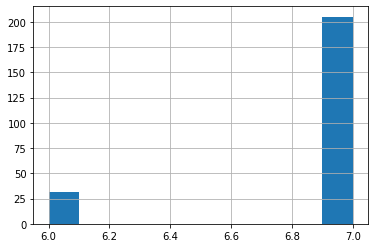

In [ ]:
df['Sentiments'].str.len().hist() 

Text(0.5, 1.0, 'Positif Reviews')

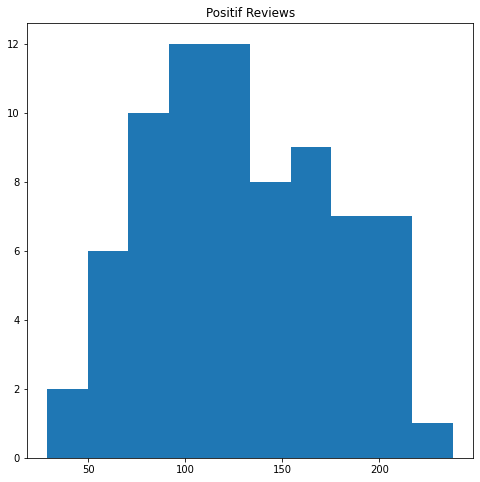

In [ ]:
fig,(ax1)=plt.subplots(figsize=(8,8))

ax1.hist(df[df['Sentiments']=='Positif']['Tweet'].str.len())
ax1.set_title( 'Positif Reviews')

Text(0.5, 1.0, 'Negatif Reviews')

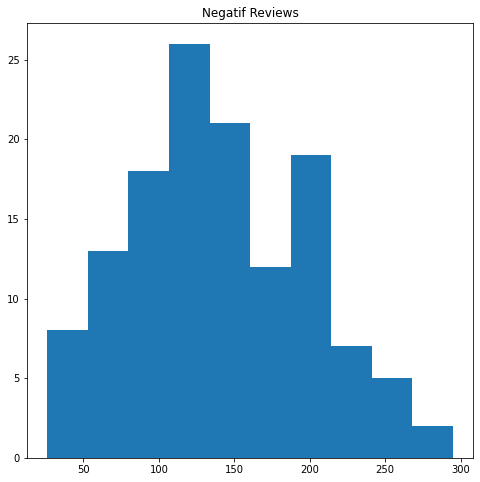

In [ ]:
fig,(ax2)=plt.subplots(figsize=(8,8))

ax2.hist(df[df['Sentiments']=='Negatif']['Tweet'].str.len())
ax2.set_title( 'Negatif Reviews')


Text(0.5, 1.0, 'Netral Reviews')

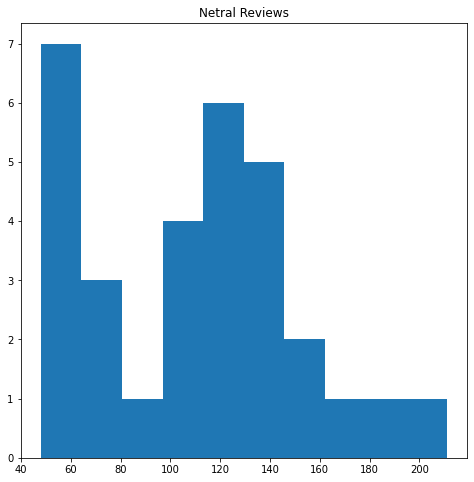

In [ ]:
fig,(ax3)=plt.subplots(figsize=(8,8))

ax3.hist(df[df['Sentiments']=='Netral']['Tweet'].str.len())
ax3.set_title( 'Netral Reviews')

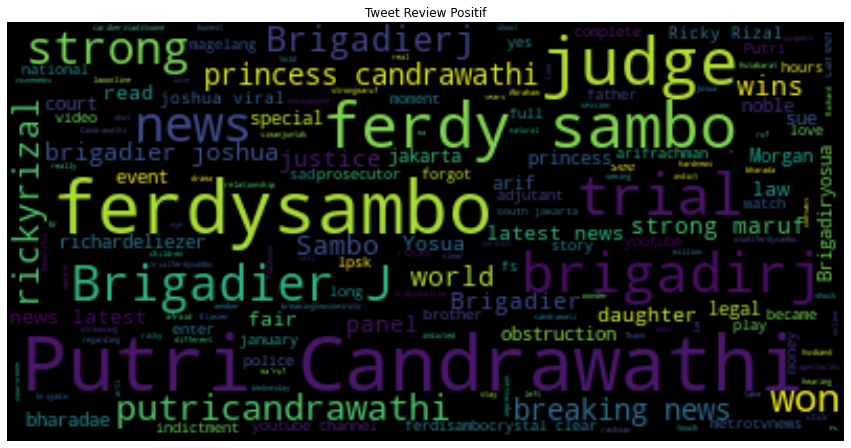

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Positif']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Positif')
plt.show()

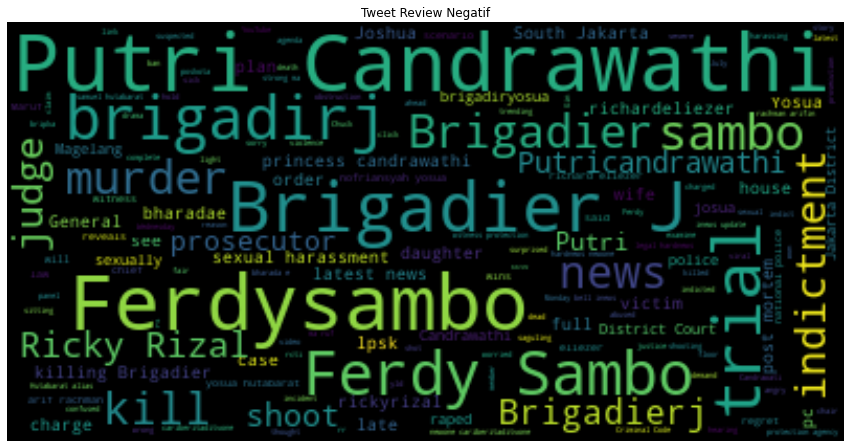

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Negatif']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Negatif')
plt.show()

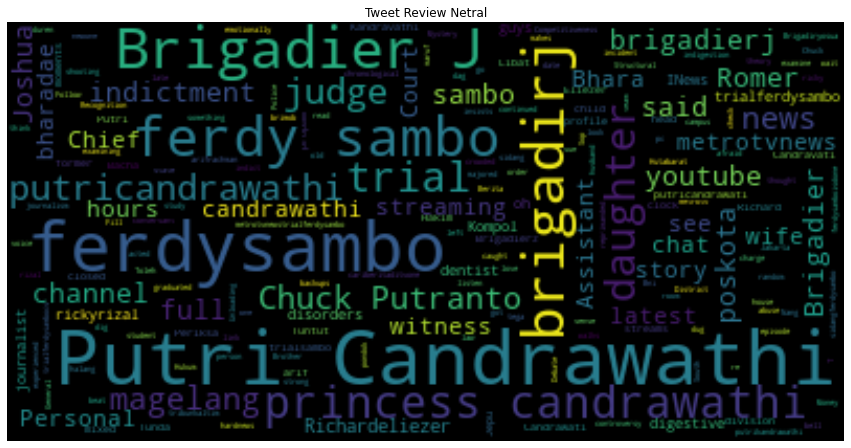

In [ ]:
text = " ".join(i for i in df[df['Sentiments']=='Netral']['Tweet'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Review Netral')
plt.show()

In [ ]:
df.rename(columns={'Tweet':'text'}, inplace = True)
df

,username,date,text,Compound_Score,Sentiments
0,terkindots,2023-01-10 13:07:33,strong sambo children event ferdy sambo lontar...,0.5106,Positif
1,Tribune Lombok com,2023-01-12 09:56:06,brigadir jreza's younger sister Putri Candrawa...,0.3400,Positif
2,Metro_TV,2023-01-13 15:01:21,just the land of south jakarta holds interroga...,-0.3182,Negatif
3,ForumTerkini,2023-01-09 04:52:18,South Jakarta District Court Holds Further Ses...,-0.5106,Negatif
4,news merah putih,2023-01-12 13:05:00,"expert ite, witness at the trial of the murder...",-0.8860,Negatif
...,...,...,...,...,...
231,with a compass,2023-01-13 12:21:53,LPSK vice chairperson Edwin Partogi Ban Terang...,-0.9432,Negatif
232,magalitorre02,2023-01-10 00:03:37,"yes, core guns are strong traitors ma'ruf Brig...",0.7184,Positif
233,magalitorre02,2023-01-14 06:11:49,"Yes, sorry for Arif Ferdisambo, the law is severe",-0.0516,Negatif
234,magalitorre02,2023-01-10 18:21:05,"Yes, all Indonesia is stupid, Ferdysambo, Sidi...",-0.1779,Negatif


In [ ]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['text'].apply(cleaning)

In [ ]:
df['Sentiments']

0      Positif
1      Positif
2      Negatif
3      Negatif
4      Negatif
        ...   
231    Negatif
232    Positif
233    Negatif
234    Negatif
235    Positif
Name: Sentiments, Length: 236, dtype: object

In [ ]:
dt = pd.DataFrame(dt)  
dt['Sentiments']=df['Sentiments']
dt

,text,Sentiments
0,strong sambo children event ferdy sambo lontar...,Positif
1,brigadir jrezas younger sister putri candrawat...,Positif
2,just the land of south jakarta holds interroga...,Negatif
3,south jakarta district court holds further ses...,Negatif
4,expert ite witness at the trial of the murder ...,Negatif
...,...,...
231,lpsk vice chairperson edwin partogi ban terang...,Negatif
232,yes core guns are strong traitors maruf brigad...,Positif
233,yes sorry for arif ferdisambo the law is severe,Negatif
234,yes all indonesia is stupid ferdysambo sidisam...,Negatif


In [ ]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dt

,text,Sentiments,no_sw
0,strong sambo children event ferdy sambo lontar...,Positif,strong sambo children event ferdy sambo lontar...
1,brigadir jrezas younger sister putri candrawat...,Positif,brigadir jrezas younger sister putri candrawat...
2,just the land of south jakarta holds interroga...,Negatif,land south jakarta holds interrogation indictm...
3,south jakarta district court holds further ses...,Negatif,south jakarta district court holds session cha...
4,expert ite witness at the trial of the murder ...,Negatif,expert ite witness trial murder brigadier mera...
...,...,...,...
231,lpsk vice chairperson edwin partogi ban terang...,Negatif,lpsk vice chairperson edwin partogi ban terang...
232,yes core guns are strong traitors maruf brigad...,Positif,core guns strong traitors maruf brigadier ferd...
233,yes sorry for arif ferdisambo the law is severe,Negatif,sorry arif ferdisambo law severe
234,yes all indonesia is stupid ferdysambo sidisam...,Negatif,indonesia stupid ferdysambo sidisambo putri ca...


In [ ]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,putri,147
1,candrawathi,143
2,brigadier,129
3,ferdysambo,114
4,sambo,94
5,ferdy,77
6,trial,77
7,brigadirj,66
8,news,64
9,judge,36


In [ ]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', width=700, height=700)

In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,Sentiments,no_sw,wo_stopfreq
0,strong sambo children event ferdy sambo lontar...,Positif,strong sambo children event ferdy sambo lontar...,strong children event lontar children event ra...
1,brigadir jrezas younger sister putri candrawat...,Positif,brigadir jrezas younger sister putri candrawat...,brigadir jrezas younger sister exchange messag...
2,just the land of south jakarta holds interroga...,Negatif,land south jakarta holds interrogation indictm...,land south jakarta holds interrogation indictm...
3,south jakarta district court holds further ses...,Negatif,south jakarta district court holds session cha...,south jakarta district court holds session cha...
4,expert ite witness at the trial of the murder ...,Negatif,expert ite witness trial murder brigadier mera...,expert ite witness murder merahputihcom case m...


In [ ]:
dt['no_sw'].loc[4]

'expert ite witness trial murder brigadier merahputihcom ferdysambo brigadier case murder putri candrawathi'

In [ ]:
dt['wo_stopfreq'].loc[4]

'expert ite witness murder merahputihcom case murder'

In [ ]:
dt

,text,Sentiments,no_sw,wo_stopfreq
0,strong sambo children event ferdy sambo lontar...,Positif,strong sambo children event ferdy sambo lontar...,strong children event lontar children event ra...
1,brigadir jrezas younger sister putri candrawat...,Positif,brigadir jrezas younger sister putri candrawat...,brigadir jrezas younger sister exchange messag...
2,just the land of south jakarta holds interroga...,Negatif,land south jakarta holds interrogation indictm...,land south jakarta holds interrogation indictm...
3,south jakarta district court holds further ses...,Negatif,south jakarta district court holds session cha...,south jakarta district court holds session cha...
4,expert ite witness at the trial of the murder ...,Negatif,expert ite witness trial murder brigadier mera...,expert ite witness murder merahputihcom case m...
...,...,...,...,...
231,lpsk vice chairperson edwin partogi ban terang...,Negatif,lpsk vice chairperson edwin partogi ban terang...,lpsk vice chairperson edwin partogi ban terang...
232,yes core guns are strong traitors maruf brigad...,Positif,core guns strong traitors maruf brigadier ferd...,core guns strong traitors maruf
233,yes sorry for arif ferdisambo the law is severe,Negatif,sorry arif ferdisambo law severe,sorry arif ferdisambo law severe
234,yes all indonesia is stupid ferdysambo sidisam...,Negatif,indonesia stupid ferdysambo sidisambo putri ca...,indonesia stupid sidisambo brigadierj


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,Sentiments,no_sw,wo_stopfreq,wo_stopfreq_lem
0,strong sambo children event ferdy sambo lontar...,Positif,strong sambo children event ferdy sambo lontar...,strong children event lontar children event ra...,strong children event lontar children event ra...
1,brigadir jrezas younger sister putri candrawat...,Positif,brigadir jrezas younger sister putri candrawat...,brigadir jrezas younger sister exchange messag...,brigadir jrezas younger sister exchange messag...
2,just the land of south jakarta holds interroga...,Negatif,land south jakarta holds interrogation indictm...,land south jakarta holds interrogation indictm...,land south jakarta holds interrogation indictm...
3,south jakarta district court holds further ses...,Negatif,south jakarta district court holds session cha...,south jakarta district court holds session cha...,south jakarta district court holds session cha...
4,expert ite witness at the trial of the murder ...,Negatif,expert ite witness trial murder brigadier mera...,expert ite witness murder merahputihcom case m...,expert ite witness murder merahputihcom case m...
...,...,...,...,...,...
231,lpsk vice chairperson edwin partogi ban terang...,Negatif,lpsk vice chairperson edwin partogi ban terang...,lpsk vice chairperson edwin partogi ban terang...,lpsk vice chairperson edwin partogi ban terang...
232,yes core guns are strong traitors maruf brigad...,Positif,core guns strong traitors maruf brigadier ferd...,core guns strong traitors maruf,core guns strong traitors maruf
233,yes sorry for arif ferdisambo the law is severe,Negatif,sorry arif ferdisambo law severe,sorry arif ferdisambo law severe,sorry arif ferdisambo law severe
234,yes all indonesia is stupid ferdysambo sidisam...,Negatif,indonesia stupid ferdysambo sidisambo putri ca...,indonesia stupid sidisambo brigadierj,indonesia stupid sidisambo brigadierj


In [ ]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])

nb.columns=['Sentiments','Tweet']
nb.Sentiments = [1 if each == "Positif" else -1 if each == "Negatif" else 0 for each in nb.Sentiments]
nb


,Sentiments,Tweet
0,1,strong children event lontar children event ra...
1,1,brigadir jrezas younger sister exchange messag...
2,-1,land south jakarta holds interrogation indictm...
3,-1,south jakarta district court holds session cha...
4,-1,expert ite witness murder merahputihcom case m...
...,...,...
231,-1,lpsk vice chairperson edwin partogi ban terang...
232,1,core guns strong traitors maruf
233,-1,sorry arif ferdisambo law severe
234,-1,indonesia stupid sidisambo brigadierj


In [ ]:
tokenized_review=nb['Tweet'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [strong, children, event, lontar, children, ev...
1    [brigadir, jrezas, younger, sister, exchange, ...
2    [land, south, jakarta, holds, interrogation, i...
3    [south, jakarta, district, court, holds, sessi...
4    [expert, ite, witness, murder, merahputihcom, ...
Name: Tweet, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['Tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['Sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 52.08%
------------------------------------------------
Confusion Matrix:
    0  1  2
0  17  6  5
1   1  1  3
2   4  4  7
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.77      0.61      0.68        28
           0       0.09      0.20      0.13         5
           1       0.47      0.47      0.47        15

    accuracy                           0.52        48
   macro avg       0.44      0.42      0.42        48
weighted avg       0.61      0.52      0.56        48



In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 60.42%
------------------------------------------------
Confusion Matrix:
    0  1  2
0  21  2  5
1   2  0  3
2   5  2  8
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.75      0.75        28
           0       0.00      0.00      0.00         5
           1       0.50      0.53      0.52        15

    accuracy                           0.60        48
   macro avg       0.42      0.43      0.42        48
weighted avg       0.59      0.60      0.60        48



In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 58.33%
------------------------------------------------
Confusion Matrix:
    0  1  2
0  25  0  3
1   4  0  1
2  12  0  3
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.89      0.72        28
           0       0.00      0.00      0.00         5
           1       0.43      0.20      0.27        15

    accuracy                           0.58        48
   macro avg       0.35      0.36      0.33        48
weighted avg       0.49      0.58      0.51        48



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



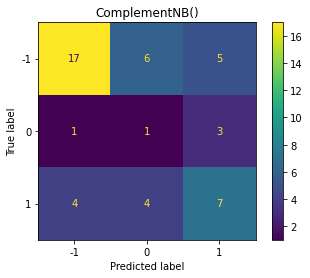

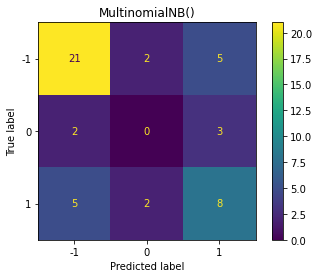

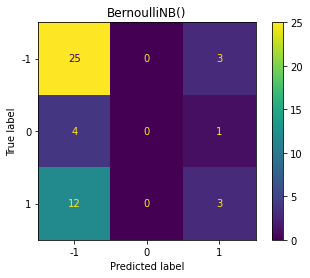

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['Tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_twograms, nb['Sentiments'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 37.50%


In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['Tweet'])

X_train, X_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['Sentiments'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 27.08%


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['Tweet'])

In [ ]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['Sentiments'],test_size=0.20,random_state=30)

In [ ]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 56.25%


In [ ]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 56.25%


In [ ]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 52.08%
